In [269]:
import cv2 as cv
import numpy as np
import os
import glob
from matplotlib import pyplot as plt

# Camera Calibration - Mono

In [283]:

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
 
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
 
img_ptsL = []
img_ptsR = []
obj_pts = []
 
for i in range(1,21):
  imgL = cv.imread(f"./calibration_samples/imageL{i}.png")
  imgR = cv.imread(f"./calibration_samples/imageR{i}.png")
  imgL_gray = cv.imread(f"./calibration_samples/imageL{i}.png",cv.IMREAD_GRAYSCALE)
  imgR_gray = cv.imread(f"./calibration_samples/imageR{i}.png",cv.IMREAD_GRAYSCALE)
 
  outputL = imgL.copy()
  outputR = imgR.copy()

  retL, cornersL = cv.findChessboardCorners(outputL,(9,6),flags=cv.CALIB_CB_ADAPTIVE_THRESH+cv.CALIB_CB_NORMALIZE_IMAGE)
  retR, cornersR =  cv.findChessboardCorners(outputR,(9,6),flags=cv.CALIB_CB_ADAPTIVE_THRESH+cv.CALIB_CB_NORMALIZE_IMAGE)  
 
  if retR and retL:
    print(i)
    obj_pts.append(objp)
    cv.cornerSubPix(imgR_gray,cornersR,(5,5),(-1,-1),criteria)
    cv.cornerSubPix(imgL_gray,cornersL,(5,5),(-1,-1),criteria)
    cv.drawChessboardCorners(outputR,(9,6),cornersR,retR)
    cv.drawChessboardCorners(outputL,(9,6),cornersL,retL)
    cv.imshow('cornersR',outputR)
    cv.imshow('cornersL',outputL)
    cv.waitKey(0)
    
    img_ptsL.append(cornersL)
    img_ptsR.append(cornersR)
 
cv.destroyAllWindows()

2
4
5
6
9
10
12
17


In [284]:

# Getting Images
img_L_temp = cv.imread('./sample/L_2.png')
img_R_temp = cv.imread('./sample/R_2.png')

# Calibrating left camera
retL, mtxL, distL, rvecsL, tvecsL = cv.calibrateCamera(obj_pts,img_ptsL,imgL_gray.shape[::-1],None,None)
hL,wL= imgL_gray.shape[:2]

# distL = np.array([ 0.002, 0.001, 0.000, 0.000, 0.000], dtype=np.float64)
new_mtxL, roiL= cv.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))

# Calibrating right camera
retR, mtxR, distR, rvecsR, tvecsR = cv.calibrateCamera(obj_pts,img_ptsR,imgR_gray.shape[::-1],None,None)
hR,wR= imgR_gray.shape[:2]

# distR = np.array([ 0.002, 0.001, 0.000, 0.000, 0.000], dtype=np.float64)
new_mtxR, roiR= cv.getOptimalNewCameraMatrix(mtxR,distR,(wR,hR),1,(wR,hR))

print("Camera Matrix Left: \n", mtxL, "\n")
print("Camera Optimal Matrix Left: \n", new_mtxL, "\n")
print("Camera Distortion Left: \n", distL, "\n")
rmatl = cv.Rodrigues(rvecsL[0])[0]
print("Camera Rotation Left: \n", rmatl, "\n")
print("Camera Translation Left: \n", tvecsL, "\n")

print("Camera Matrix Right: \n", mtxR, "\n")
print("Camera Optimal Matrix Left: \n", new_mtxR, "\n")
print("Camera Distortion Right: \n", distR, "\n")
rmatr = cv.Rodrigues(rvecsR[0])[0]
print("Camera Rotation Right: \n", rmatr, "\n")
print("Camera Translation Right: \n", tvecsR, "\n")

# retR, retL - RMS Error
# mtxl, mtxR - camera matrix
# distL , distR - distortion coefficients
# rvecsL, rvecsR - rotation vectors
# tvecsL, tvecsR - translation vectors

# new_mtxL, new_mtxR - new camera 
# roiL, roiR - region of interest

Camera Matrix Left: 
 [[764.56408479   0.         401.24723483]
 [  0.         763.77872216 312.6113504 ]
 [  0.           0.           1.        ]] 

Camera Optimal Matrix Left: 
 [[760.9294465    0.         402.6381492 ]
 [  0.         755.84282434 311.17288559]
 [  0.           0.           1.        ]] 

Camera Distortion Left: 
 [[-0.02823398 -0.46211274 -0.00347454  0.00256104  1.81582028]] 

Camera Rotation Left: 
 [[ 0.99525659 -0.08511004 -0.0471232 ]
 [ 0.07376266  0.97600262 -0.20488524]
 [ 0.06343016  0.20043746  0.97765098]] 

Camera Translation Left: 
 (array([[-14.91691009],
       [ -3.96472938],
       [ 39.90197898]]), array([[-13.10671221],
       [ -7.28609925],
       [ 54.58136457]]), array([[-2.92580126],
       [-9.44713119],
       [58.2078502 ]]), array([[-15.62320614],
       [ -1.47866281],
       [ 42.55960128]]), array([[-4.23523696],
       [ 3.02210252],
       [30.98203696]]), array([[-5.36274861],
       [ 0.29857829],
       [32.91063716]]), array([[-

# Stereo Calibration

In [277]:
criteria_stereo= (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

retS, new_mtxL, distL, new_mtxR, distR, Rot, Trns, Emat, Fmat = cv.stereoCalibrate(obj_pts, img_ptsL, img_ptsR, new_mtxL, distL, new_mtxR, distR, imgL_gray.shape[::-1], criteria_stereo)

print("Camera Matrix: \n", new_mtxL, "\n")
print("Camera Distortion: \n", distL, "\n")
print("Camera Matrix: \n", new_mtxR, "\n")
print("Camera Distortion: \n", distR, "\n")
print("Camera Rotation: \n", Rot, "\n")
print("Camera Translation: \n", Trns, "\n")
print("Camera Essential Matrix: \n", new_mtxL, "\n")
print("Camera Fundamental Matrix: \n", new_mtxR, "\n")


Camera Matrix: 
 [[742.59649698   0.         403.75115096]
 [  0.         740.56945019 309.2628917 ]
 [  0.           0.           1.        ]] 

Camera Distortion: 
 [[-0.05974849 -0.2668313  -0.00389541  0.00158438  1.20345177]] 

Camera Matrix: 
 [[796.89763727   0.         395.36478057]
 [  0.         790.20729808 318.68210704]
 [  0.           0.           1.        ]] 

Camera Distortion: 
 [[-2.73998710e-02 -1.83370184e-01 -1.04902738e-03 -1.04515336e-03
   1.24010806e+00]] 

Camera Rotation: 
 [[-0.01031517 -0.09870277 -0.9950635 ]
 [-0.12665394  0.98723084 -0.0966129 ]
 [ 0.99189333  0.12503213 -0.02268455]] 

Camera Translation: 
 [[43.56505201]
 [ 0.37698527]
 [49.4482047 ]] 

Camera Essential Matrix: 
 [[742.59649698   0.         403.75115096]
 [  0.         740.56945019 309.2628917 ]
 [  0.           0.           1.        ]] 

Camera Fundamental Matrix: 
 [[796.89763727   0.         395.36478057]
 [  0.         790.20729808 318.68210704]
 [  0.           0.           1.  

# Stereo Rectification

In [278]:

R = np.array([[1.0, 0, 0],
              [0, 1.0, 0],
              [0, 0, 1.0]])

print(R)
T = np.array([-0.01, 0, 0])  # Translation between cameras (in meters)

print(Trns)
rect_l, rect_r, proj_mat_l, proj_mat_r, Q, roiL, roiR= cv.stereoRectify(new_mtxL, distL, new_mtxR, distR, imgL_gray.shape[::-1], R, Trns, alpha=0)

print("Rectification transform Left : \n", rect_l, "\n")
print("Rectification transform Right : \n", rect_r, "\n")
print("Projection matrix Left : \n", proj_mat_l, "\n")
print("Projection matrix Right : \n", proj_mat_r, "\n")
print("Disparity to Depth matrix : \n", Q, "\n")
print("ROI Left : \n", roiL, "\n")
print("ROI Right : \n", roiR, "\n")


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[43.56505201]
 [ 0.37698527]
 [49.4482047 ]]
Rectification transform Left : 
 [[ 0.66104996  0.00572032  0.75032009]
 [-0.00572032  0.9999803  -0.00258395]
 [-0.75032009 -0.00258395  0.66106966]] 

Rectification transform Right : 
 [[ 0.66104996  0.00572032  0.75032009]
 [-0.00572032  0.9999803  -0.00258395]
 [-0.75032009 -0.00258395  0.66106966]] 

Projection matrix Left : 
 [[ 3.27796137e+03  0.00000000e+00 -1.23233064e+03  0.00000000e+00]
 [ 0.00000000e+00  3.27796137e+03  3.27719585e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]] 

Projection matrix Right : 
 [[ 3.27796137e+03  0.00000000e+00 -1.23233064e+03  2.16026877e+05]
 [ 0.00000000e+00  3.27796137e+03  3.27719585e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]] 

Disparity to Depth matrix : 
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  1.23233064e+03]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 

# Compute the mapping required to obtain the undistored rectified stereo image pair

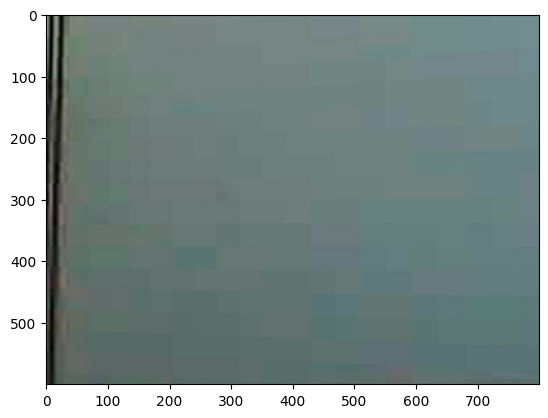

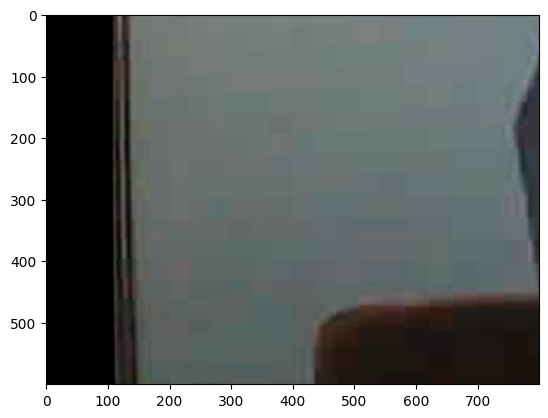

In [279]:

Left_Stereo_Map= cv.initUndistortRectifyMap(new_mtxL, distL, rect_l, proj_mat_r,
                                             imgL_gray.shape[::-1], cv.CV_16SC2)


Right_Stereo_Map= cv.initUndistortRectifyMap(new_mtxR, distR, rect_r, proj_mat_l,
                                              imgR_gray.shape[::-1], cv.CV_16SC2)


Left_nice= cv.remap(img_L_temp, Left_Stereo_Map[0], Left_Stereo_Map[1], cv.INTER_LANCZOS4, cv.BORDER_CONSTANT, 0)
Right_nice= cv.remap(img_R_temp, Right_Stereo_Map[0], Right_Stereo_Map[1], cv.INTER_LINEAR, cv.BORDER_CONSTANT, 0)

plt.imshow(Left_nice)
plt.show()

plt.imshow(Right_nice)
plt.show()




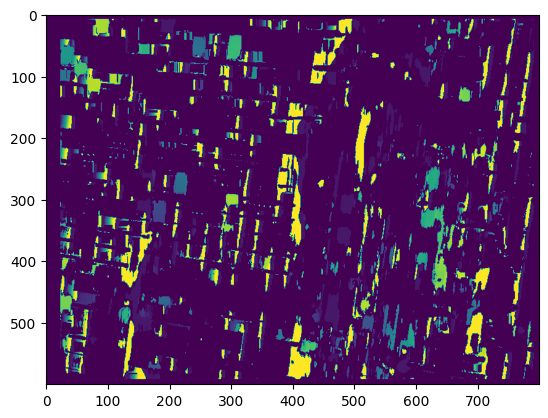

In [255]:
Left_dis = cv.cvtColor(Left_nice, cv.COLOR_BGR2GRAY)
Right_dis = cv.cvtColor(Right_nice, cv.COLOR_BGR2GRAY)

stereo = cv.StereoBM_create(numDisparities=16, blockSize=17)
disparity = stereo.compute(Left_dis, Right_dis)
plt.imshow(disparity)
plt.show()